In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from relbench.datasets import get_dataset
from relbench.tasks import get_task

%load_ext autoreload
%autoreload 2

dataset = get_dataset(name='rel-trial', process=False)

loading Database object from /afs/cs.stanford.edu/u/kexinh/.cache/relbench/rel-trial/db...
done in 6.32 seconds.


In [3]:
dataset.get_db().table_dict.keys()

dict_keys(['interventions_studies', 'sponsors', 'sponsors_studies', 'conditions_studies', 'outcomes', 'conditions', 'reported_event_totals', 'studies', 'designs', 'drop_withdrawals', 'outcome_analyses', 'interventions', 'eligibilities', 'facilities_studies', 'facilities'])

In [4]:
for i,j in dataset.get_db().table_dict.items():
    print(i)
    display(j.df.head(1))

interventions_studies


,id,nct_id,intervention_id,date
0,0,25,1619,2000-01-01


sponsors


,sponsor_id,name,agency_class
0,0,Johns Hopkins All Children's Hospital,OTHER


sponsors_studies


,id,nct_id,sponsor_id,lead_or_collaborator,date
0,0,10,5744,lead,2000-01-01


conditions_studies


,id,nct_id,condition_id,date
0,0,11,285,2000-01-01


outcomes


,id,nct_id,outcome_type,title,description,time_frame,population,units,units_analyzed,dispersion_type,param_type,date
0,0,332,Secondary,Mean Change From Baseline in Nighttime Symptom...,Mean change from baseline in Nighttime Symptom...,Baseline and Week 2,The secondary efficacy analyses were based on ...,Units on a Scale,None,95% Confidence Interval,Least Squares Mean,2000-05-31


conditions


,condition_id,mesh_term
0,0,Paralysis


reported_event_totals


,id,nct_id,event_type,classification,subjects_affected,subjects_at_risk,date
0,0,332,other,"Total, other adverse events",0.0,352.0,2000-05-31


studies


,nct_id,start_date,target_duration,study_type,acronym,baseline_population,brief_title,official_title,phase,enrollment,...,is_ppsd,is_us_export,biospec_retention,biospec_description,source_class,baseline_type_units_analyzed,fdaaa801_violation,plan_to_share_ipd,detailed_descriptions,brief_summaries
0,0,2000-01-01,None,Observational,HEMAJA,None,Unicentric Retrospective Analysis of a Cohort ...,Unicentric Retrospective Analysis of a Cohort ...,None,602.0,...,None,None,None,None,OTHER,None,None,No,The therapeutic results (response and survival...,Unicentric retrospective analysis of a cohort ...


designs


,id,nct_id,allocation,intervention_model,observational_model,primary_purpose,time_perspective,masking,masking_description,intervention_model_description,subject_masked,caregiver_masked,investigator_masked,outcomes_assessor_masked,date
0,0,5,None,None,Cohort,None,Retrospective,None,None,None,None,None,None,None,2000-01-01


drop_withdrawals


,id,nct_id,period,reason,count,date
0,0,332,Overall Study,Lack of Efficacy,8.0,2000-05-31


outcome_analyses


,id,nct_id,outcome_id,non_inferiority_type,non_inferiority_description,param_type,param_value,dispersion_type,dispersion_value,p_value_modifier,...,p_value_description,method,method_description,estimate_description,groups_description,other_analysis_description,ci_upper_limit_raw,ci_lower_limit_raw,p_value_raw,date
0,0,646,7,Non-Inferiority or Equivalence,ANOVA will be performed on ln-transformed Ae0-...,Ratio of the mean,97.94,None,NaN,None,...,None,None,None,Bioequivalence is established when 90% Confide...,None,None,NaN,NaN,NaN,2000-07-31


interventions


,intervention_id,mesh_term
0,0,Tepotinib


eligibilities


,id,nct_id,sampling_method,gender,minimum_age,maximum_age,healthy_volunteers,population,criteria,gender_description,gender_based,adult,child,older_adult,date
0,0,4,Non-Probability Sample,All,None,None,No,Patients with proven gastric adenocarcinoma un...,Inclusion Criteria:~all patients undergoing su...,None,None,t,t,t,2000-01-01


facilities_studies


,id,nct_id,facility_id,date
0,0,32,106096,2000-01-01


facilities


,facility_id,name,city,state,zip,country
0,0,"Daiichi Sankyo, Inc.",Basking Ridge,New Jersey,07920,United States


# Task 1: trial-outcome: if a trial will meet its primary outcome?

In [5]:
task = get_task('rel-trial', 'study-outcome', download=True)

In [6]:
task.get_table("train").df.columns

Index(['timestamp', 'nct_id', 'outcome'], dtype='object')

In [7]:
print('TRAIN\n')

print(f'{len(task.get_table("train").df):,} samples over {task.get_table("train").df.nct_id.nunique():,} trials.')
print()
print('Label Distribution:')
print(task.get_table("train").df.outcome.value_counts(normalize=True))
print()
print('Temporal dist of samples:')
print(task.get_table("train").df.timestamp.dt.strftime('%Y-%m').value_counts(normalize=True).sort_index())
print()
print('Temporal dist of trials (first appearance):')
print(
    # timestamp is sorted in desc order ==> keep='last'
    task.get_table("train").df
    .drop_duplicates(subset='nct_id', keep='last')
    .groupby('timestamp').nct_id.nunique() / task.get_table("train").df.nct_id.nunique()
)

TRAIN

11,994 samples over 11,994 trials.

Label Distribution:
outcome
1    0.637569
0    0.362431
Name: proportion, dtype: float64

Temporal dist of samples:
timestamp
2001-01    0.000167
2002-01    0.000167
2003-01    0.000584
2004-01    0.002751
2005-01    0.003085
2006-01    0.007420
2007-01    0.017009
2008-01    0.060447
2009-01    0.069368
2010-01    0.071703
2011-01    0.072119
2012-01    0.073954
2013-01    0.079206
2014-01    0.082541
2015-01    0.087044
2016-01    0.091129
2017-01    0.096131
2018-01    0.094047
2019-01    0.091129
Name: proportion, dtype: float64

Temporal dist of trials (first appearance):
timestamp
2001-01-05    0.000167
2002-01-05    0.000167
2003-01-05    0.000584
2004-01-05    0.002751
2005-01-04    0.003085
2006-01-04    0.007420
2007-01-04    0.017009
2008-01-04    0.060447
2009-01-03    0.069368
2010-01-03    0.071703
2011-01-03    0.072119
2012-01-03    0.073954
2013-01-02    0.079206
2014-01-02    0.082541
2015-01-02    0.087044
2016-01-02    0.09

In [8]:
print('VAL\n')

print(f'{len(task.get_table("val").df):,} samples over {task.get_table("val").df.nct_id.nunique():,} trials.')
print()
print('Label Distribution:')
print(task.get_table("val").df.outcome.value_counts(normalize=True))
print()
print('Temporal dist of samples:')
print(task.get_table("val").df.timestamp.dt.strftime('%Y-%m').value_counts(normalize=True).sort_index())
print()
print(f'User overlap between train and val: {len(set(task.get_table("train").df.nct_id) & set(task.get_table("val").df.nct_id)):,}')

VAL

960 samples over 960 trials.

Label Distribution:
outcome
1    0.584375
0    0.415625
Name: proportion, dtype: float64

Temporal dist of samples:
timestamp
2020-01    1.0
Name: proportion, dtype: float64

User overlap between train and val: 0


Each validation/test trials are completely new trials. So it is almost like an inductive setting - a new node comes in to the graph

# Task 2: trial-adverse: what is number of adverse events?

In [9]:
task = get_task('rel-trial', 'study-adverse', download=True)

<Axes: >

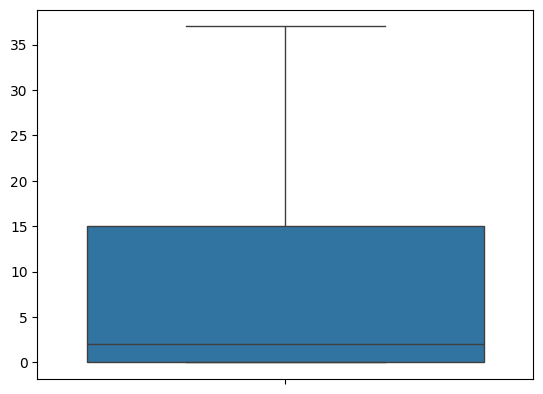

In [10]:
sns.boxplot(task.get_table("train").df.num_of_adverse_events.values, showfliers=False)

<Axes: >

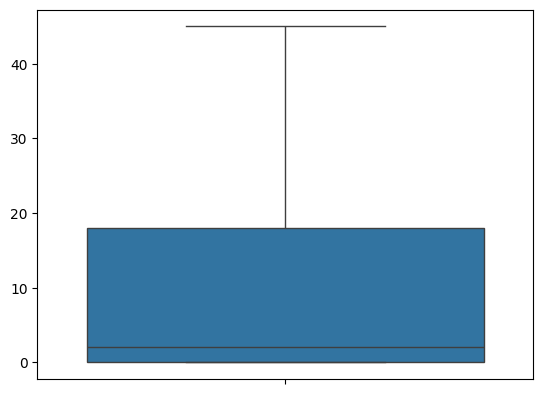

In [11]:
sns.boxplot(task.get_table("val").df.num_of_adverse_events.values, showfliers=False)

In [13]:
task.get_table("train").df.num_of_adverse_events.value_counts()

num_of_adverse_events
0.0       17678
1.0        3135
2.0        2166
3.0        1599
4.0        1320
          ...  
807.0         1
2646.0        1
256.0         1
3134.0        1
2765.0        1
Name: count, Length: 897, dtype: int64

In [14]:
len(task.get_table("train").df[task.get_table("train").df.num_of_adverse_events == 0])/len(task.get_table("train").df)

0.4079381562247606

40.8% of training trials have 0 adverse events

In [15]:
len(task.get_table("val").df[task.get_table("val").df.num_of_adverse_events == 0])/len(task.get_table("val").df)

0.3918242491657397

/tmp/user/21201/ipykernel_2511998/3225043379.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(task.val_table.df.num_of_adverse_events)


<Axes: xlabel='num_of_adverse_events', ylabel='Density'>

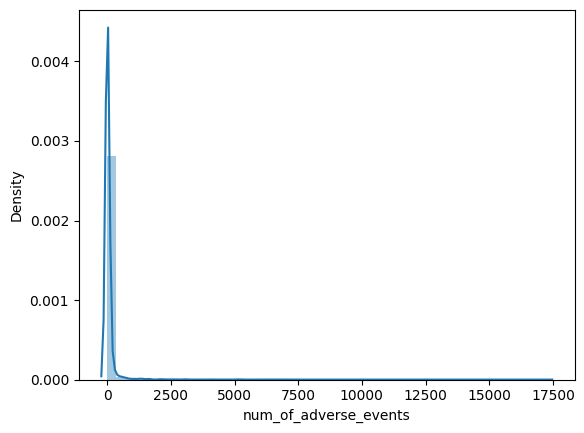

In [20]:
sns.distplot(task.get_table("val").df.num_of_adverse_events)

# Task 3: trial-withdrawl: Predict the the set of reasons of withdrawals for each trial in the next 1 year

In [21]:
task = get_task('rel-trial', 'study-withdrawal', download=True)

In [26]:
import numpy as np
## check label imbalance
np.sum(np.vstack(task.get_table("train").df.withdraw_reasons.values), axis = 0)

array([15706, 12334, 12669,  6133,  5990,  5021,  4126,   916,   444,
         545,   340,   427,   308,   220,   290])

<Axes: ylabel='Count'>

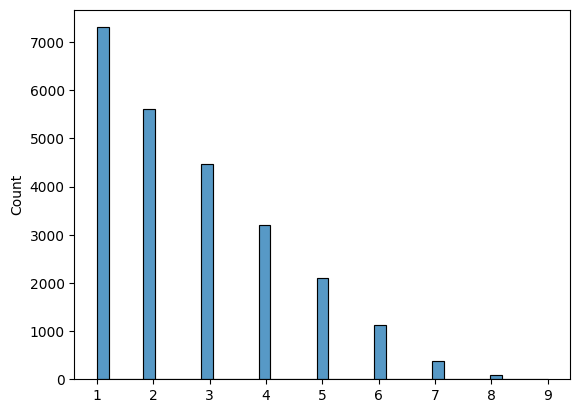

In [28]:
## check how many labels do each trial have
sns.histplot(np.sum(np.vstack(task.get_table("train").df.withdraw_reasons.values), axis = 1))

In [30]:
len(task.get_table("train").df.nct_id.unique())

24289

In [32]:
len(task.get_table("val").df.nct_id.unique())

1974

In [33]:
# check if any of the label is correlated to each other
y = np.vstack(task.get_table("train").df.withdraw_reasons.values)

In [35]:
corr = pd.DataFrame(y).corr()

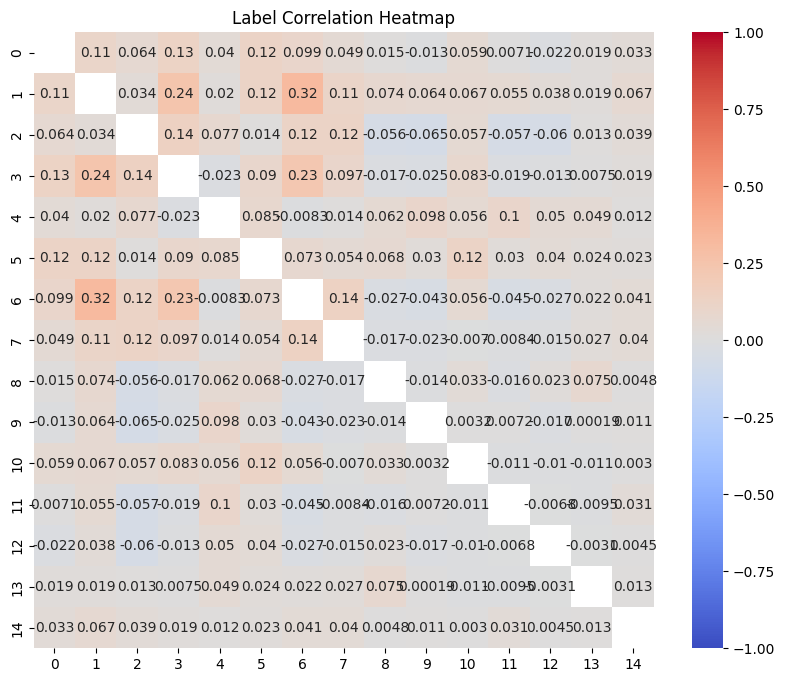

In [37]:
np.fill_diagonal(corr.values, np.nan)

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Label Correlation Heatmap')
plt.show()

# Task 4: rel-trial-site: Predict the success rate of a trial site in the next 1 year.

In [38]:
task = get_task('rel-trial', 'site-success', download=True)

/tmp/user/21201/ipykernel_2511998/4175891164.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(task.train_table.df.success_rate)
/tmp/user/21201/ipykernel_2511998/4175891164.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(task.val_table.df.success_rate)


<Axes: xlabel='success_rate', ylabel='Density'>

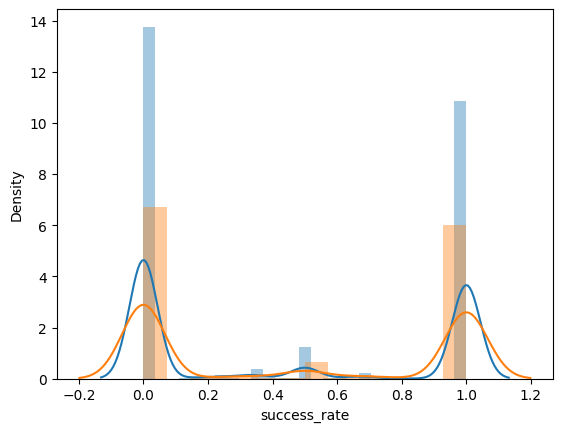

In [43]:
sns.distplot(task.get_table("train").df.success_rate)
sns.distplot(task.get_table("val").df.success_rate)